# Demo: Horse

This notebook demonstrates how the noisy minimum spanning tree union ($n$-MST) and $k$-nearest minimum spanning tree ($k$-MST) behave on an horse-shaped mesh-reconstruction dataset. The dataset is characterized by large variations in density corresponding to local level of details. Our goal is to find a graph with a single connected component that describes the horse's structure.

In [1]:
import pandas as pd
from umap import UMAP
from scipy.sparse import save_npz

from multi_mst.k_mst import KMST
from multi_mst.noisy_mst import NoisyMST
from lib.drawing import draw_graph, draw_umap, draw_force

The data is loaded from a file locally and contains x, y, and z coordinates.

In [2]:
df = pd.read_csv('./data/horse.csv')

### UMAP

UMAP is used to demonstrate $k$-nearest neighbour network approaches on this dataset. Notice how at low values of $k$ many separate components are detected. At higher values of $k$ a single component emerges, but local details start to disappear.

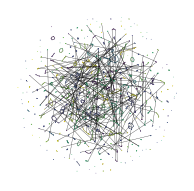

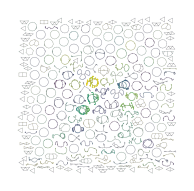

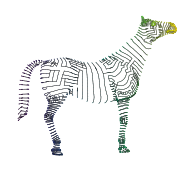

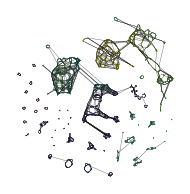

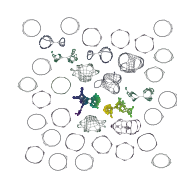

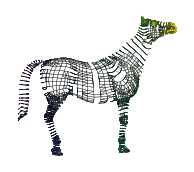

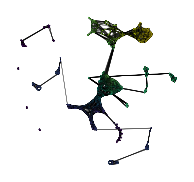

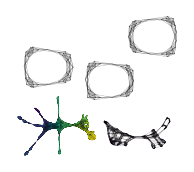

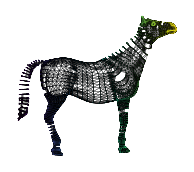

In [3]:
for k in [3, 5, 10]:
    p = UMAP(
        n_neighbors=k, 
        init='random' if k == 3 else 'spectral',
        repulsion_strength=1 if k < 10 else 0.2,
    ).fit(df)
    draw_umap(p, color=df.z, name='horse', alg=f'umap_{k}')
    draw_force(p, color=df.z, name='horse', alg=f'umap_{k}')
    draw_graph(p, df.z, df.y, color=df.z, name='horse', alg=f'umap_{k}')

### $k$-MST

The $k$-MST captures the global connectivity with few edges at low values of $k$:

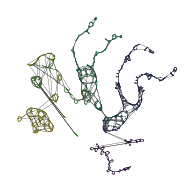

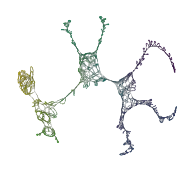

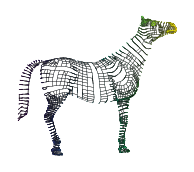

In [4]:
p = KMST(num_neighbors=3).fit(df)
draw_umap(p, color=df.z, name='horse', alg=f'kmst_3')
draw_force(p, color=df.z, name='horse', alg=f'kmst_3')
draw_graph(p, df.z, df.y, color=df.z, name='horse', alg=f'kmst_3')

### Noisy MST

The $n$-MST behaves similarly!

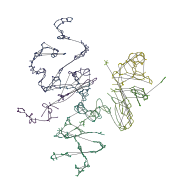

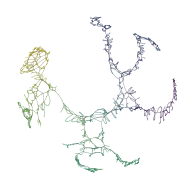

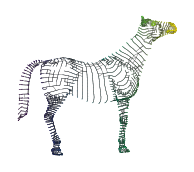

In [5]:
p = NoisyMST(num_trees=3, noise_fraction=0.6).fit(df)
draw_umap(p, color=df.z, name='horse', alg=f'nmst_3')
draw_force(p, color=df.z, name='horse', alg=f'nmst_3')
draw_graph(p, df.z, df.y, color=df.z, name='horse', alg=f'nmst_3')